# Gather Section (20 Questions, 40 Marks)

You should have access to a file called TMDB.db. The first step to answering this set of questions will be to connect to this db file to access the data.

![SQL Architectures](https://raw.githubusercontent.com/Explore-AI/Public-Data/master/image/TMDB_ERD.JPG)

Before we start we need to load our SQL magic commands (we only need do this once per notebook):

In [1]:
!pip install ipython-sql
%load_ext sql

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)





Based on that data, answer the following questions:


### Question 1
What is the code you can use to connect to the TMDB database that is saved in a Colab notebook?


In [2]:
%sql sqlite:////content/TMDB.db

### Question 2
What is the primary key for the table “movies”?

movie_id


In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')

query = '''
PRAGMA table_info(movies);
'''

cursor = conn.cursor()

cursor.execute(query)

columns_info = cursor.fetchall()

conn.close()

primary_key = None


# using the query above(alone with sql magic) the coulmn [5] has a value of 0,1 and its name is pk(it says is this the primary key or not)
for col in columns_info:
    if col[5] == 1:
        primary_key = col[1]
        break

if primary_key:
    print(f"The primary key for the 'movies' table is: {primary_key}")
else:
    print("No primary key found for the 'movies' table.")


The primary key for the 'movies' table is: movie_id


### Question 3
How many foreign keys does the “languagemap” table have?

2

In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

sql_query = '''
PRAGMA foreign_key_list(languagemap);
'''


cursor.execute(sql_query)


counter = 0

rows = cursor.fetchall()

for row in rows:
  counter += 1


print(f"number of forign keys are {counter}")

number of forign keys are 2


### Question 4
What code would you use to set up a view of all movies that did not get released?


In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

cursor.execute("DROP VIEW IF EXISTS unreleased_movies;")
cursor.execute("""
CREATE VIEW unreleased_movies AS
SELECT * FROM movies WHERE release_status IS NOT 'Released';
""")
cursor.execute("SELECT * FROM unreleased_movies;")

unreleased_movies = cursor.fetchall()
conn.close()

unreleased_movies_list = [movie for movie in unreleased_movies]

for movie in unreleased_movies_list:
    print(movie)


(40963, 'Little Big Top', '2006-01-01 00:00:00.000000', 0, None, 'en', 'Little Big Top', 'An aging out of work clown returns to his small hometown, resigned to spend the rest of his days in a drunken stupor. But when his passion for clowning is reawakened by the local amateur circus he finds his smile.', 0.0921, 0.0, 0.0, 'Rumored', None, 10.0, 1)
(43630, 'The Helix... Loaded', '2005-01-01 00:00:00.000000', 0, None, 'en', 'The Helix... Loaded', ' ', 0.0206, 0.0, 97.0, 'Rumored', None, 4.8, 2)
(50875, 'Higher Ground', '2011-08-26 00:00:00.000000', 2000000, 'http://www.sonyclassics.com/higherground/', 'en', 'Higher Ground', "A chronicle of one woman's lifelong struggle with her faith.", 1.699101, 841733.0, 109.0, 'Post Production', None, 5.3, 14)
(57294, 'Crying with Laughter', '2009-06-01 00:00:00.000000', 0, None, 'en', 'Crying with Laughter', 'Powerfully redemptive and darkly comedic revenge thriller set in the vicious world of stand-up comedy, starring Stephen McCole and Malcolm Shie

### Question 5
How would you select only the title, release date, and release status columns from the view you created in the previous question?


In [ ]:
import sqlite3



conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

cursor.execute("SELECT title, release_date, release_status FROM unreleased_movies;")


unreleased_movies = cursor.fetchall()
conn.close()

unreleased_movies_list = [movie for movie in unreleased_movies]

for movie in unreleased_movies_list:
    print(movie)


('Little Big Top', '2006-01-01 00:00:00.000000', 'Rumored')
('The Helix... Loaded', '2005-01-01 00:00:00.000000', 'Rumored')
('Higher Ground', '2011-08-26 00:00:00.000000', 'Post Production')
('Crying with Laughter', '2009-06-01 00:00:00.000000', 'Rumored')
('The Harvest (La Cosecha)', '2011-07-29 00:00:00.000000', 'Rumored')
('The Naked Ape', '2006-09-16 00:00:00.000000', 'Rumored')
('Brotherly Love', '2015-04-24 00:00:00.000000', 'Post Production')
("Dancin' It's On", '2015-10-16 00:00:00.000000', 'Post Production')


### Question 6
How many movies are no longer using their original titles?



In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()


cursor.execute("SELECT COUNT(*) FROM movies WHERE title <> original_title;")

count = cursor.fetchone()
#the count is a tuble now and its like this-> (0,) so must use the index[0]

if count[0] == 0:
  print("all movies still uses the original name, nothing changed")

else:
  print(f"there are {count[0]} movies that is no longer use its original name")

there are 261 movies that is no longer use its original name


### Question 7
What is the most popular movie that was made after 01/01/2000 with a budget of more than $100 000 000? (Hint: Use the popularity field in the Movies table. Larger numbers are more popular.)


In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

cursor.execute('''
SELECT title, release_date, budget, popularity FROM movies

WHERE release_date > '2000-01-01'
AND
budget > 100000000


ORDER BY popularity DESC
LIMIT 1;''')

the_movie = cursor.fetchone()

print(f"its: {the_movie[0]}")

its: Interstellar


### Question 8
How many movies are there that do not have English as their original language?



In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

cursor.execute('''
SELECT COUNT(*) FROM movies WHERE original_language != 'en';''')

count = cursor.fetchone()

print(f"there are {count[0]} that is not in english")


there are 298 that is not in english


### Question 9
In how many movies did Tom Cruise portray the character Ethan Hunt?



In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

cursor.execute('''SELECT COUNT(*) AS ethan_hunt_movies FROM actors

JOIN casts ON actors.actor_id = casts.actor_id

JOIN movies ON casts.movie_id = movies.movie_id

WHERE

actors.actor_name = 'Tom Cruise'

AND

casts.characters = 'Ethan Hunt';''')

n = cursor.fetchone()

print(f"tom cruise did ethan hunt in {n[0]} movies")

tom cruise did ethan hunt in 5 movies


### Question 10
How many times was the actress Cate Blanchett nominated for an Oscar?

In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

cursor.execute('''
SELECT COUNT(*) FROM Oscars WHERE name == 'Cate Blanchett' AND winner IS NOT 1.0;''')

nominated = cursor.fetchone()

print(f"she was nominated {nominated[0]} times")


she was nominated 5 times


### Question 11
What would be the code to insert a new genre called ‘Sport’ with an id of 10?


In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()


cursor.execute('''
INSERT INTO Genres (genre_id, genre_name)
VALUES
(10, "Sport");
''')


cursor.execute('''
SELECT * FROM Genres WHERE genre_id = 10;
''')



to_make_sure = cursor.fetchall()

print(f"this is to make sure its there and is inserted\n{to_make_sure[0]}")

this is to make sure its there and is inserted
(10, 'Sport')


### Question 12
You have just watched The Flintstones movie and did not find it very funny. What code would delete the entry that links The Flintstones to the Comedy genre?


In [ ]:
import sqlite3

conn = sqlite3.connect('TMDB.db')
cursor = conn.cursor()

cursor.execute('''
DELETE FROM GenreMap
WHERE movie_id = (
    SELECT movie_id
    FROM Movies
    WHERE title = 'The Flintstones'
)
AND genre_id = (
    SELECT genre_id
    FROM Genres
    WHERE genre_name = 'Comedy'
);
''')



### Question 13
What code will give me the 10 most recently released movies in the database? and put it in a list


In [ ]:
import sqlite3

con = sqlite3.connect('TMDB.db')
cursor = con.cursor()

SQL_query = '''
SELECT title FROM movies
ORDER BY release_date DESC
LIMIT 10;

'''
cursor.execute(SQL_query)

movies = []

rows = cursor.fetchall()
for row in rows:
    movies.append(row[0])

con.close()

for movie_name in movies:
  print(movie_name)

Growing Up Smith
Two Lovers and a Bear
Mr. Church
The Birth of a Nation
Kicks
Antibirth
Hands of Stone
Ben-Hur
Pete's Dragon
Suicide Squad


### Question 14
# Visualization with Python

You can choose **any table** from the database and create visualizations using Python libraries like **Matplotlib** or **Seaborn**. The goal is to explore and understand the data through visual analysis.

For example, you could create a **bar chart** to show the number of movies in each genre or a **scatter plot** to compare movie **budget vs. revenue**.

You can also **combine data from multiple tables** (using SQL joins) to create more complex visualizations. For instance, you might join the **Movies** table with the **Genres** table to show which genres have the highest-rated movies.



### Example Ideas:
- **Genres**: Visualize the most popular genres by the number of movies.
- **Budget vs Revenue**: Analyze the relationship between movie budget and revenue.
- **Languages**: Show the distribution of movies by language using a pie chart.
- **Movie Trends**: Visualize how the number of movie releases has changed over the years.




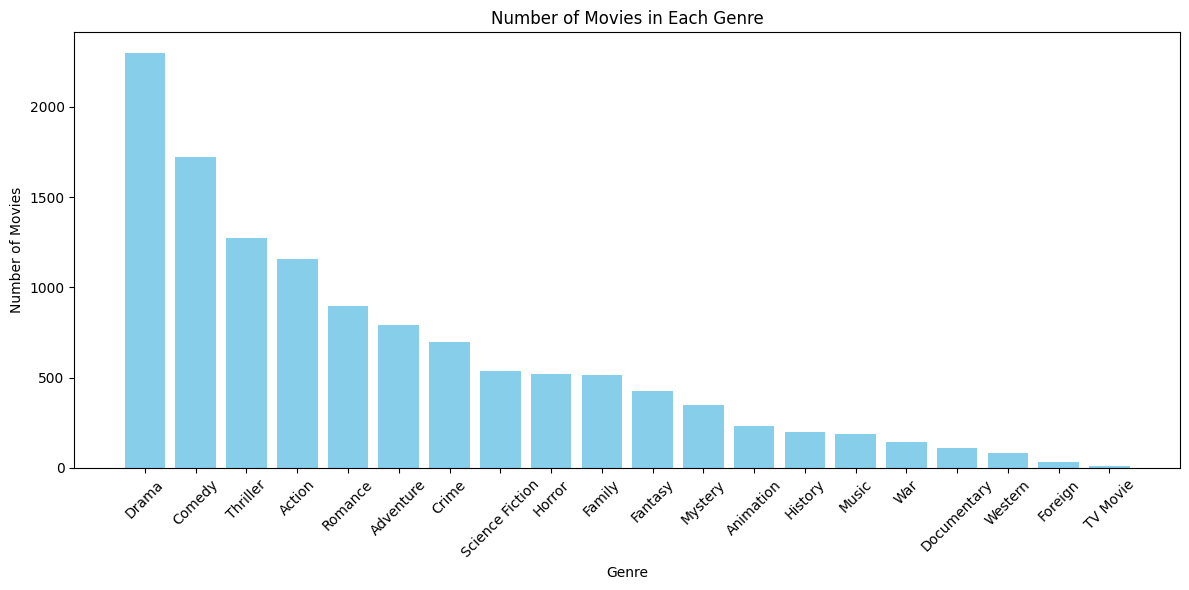

In [4]:
#this bar chart is to know number of moveis in each genre

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('TMDB.db')

# Query to count movies in each genre
query_genres = '''
SELECT g.genre_name, COUNT(gm.movie_id) AS movie_count
FROM genres g
JOIN genremap gm ON g.genre_id = gm.genre_id
JOIN movies m ON gm.movie_id = m.movie_id
GROUP BY g.genre_name
ORDER BY movie_count DESC
'''

# Load data into a DataFrame
genre_data = pd.read_sql_query(query_genres, conn)

# Plotting the number of movies in each genre
plt.figure(figsize=(12, 6))
plt.bar(genre_data['genre_name'], genre_data['movie_count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# Close the connection
conn.close()






# insights : people tend to enjoy drama (most) , comedy , theriller and war more than history and tv movies



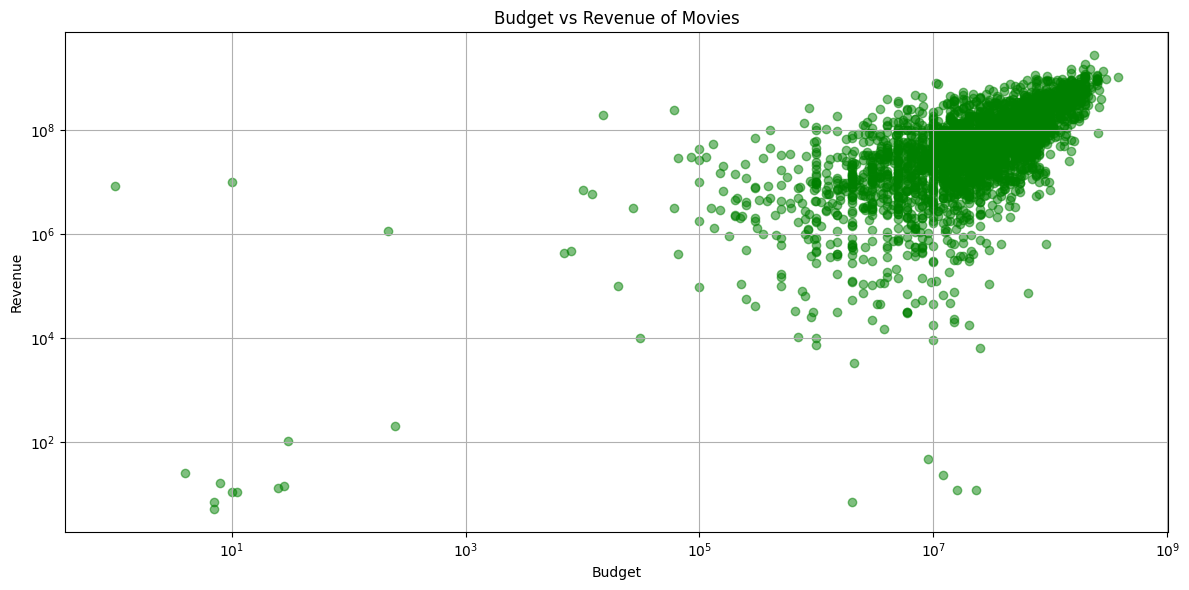

In [ ]:
# scatter plot to know the corrleation betwen the revenue and budget or cost

# Connect to the database again for the next query
conn = sqlite3.connect('TMDB.db')

# Query to get budget and revenue data
query_budget_revenue = '''
SELECT budget, revenue
FROM movies
WHERE budget > 0 AND revenue > 0
'''

# Load data into a DataFrame
budget_revenue_data = pd.read_sql_query(query_budget_revenue, conn)

# Plotting budget vs. revenue
plt.figure(figsize=(12, 6))
plt.scatter(budget_revenue_data['budget'], budget_revenue_data['revenue'], alpha=0.5, color='green')
plt.title('Budget vs Revenue of Movies')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.grid()
plt.tight_layout()
plt.show()

# Close the connection
conn.close()


#insights : the more higher the budget the more (likley) the revenue would be high and the risk is low with some outlires


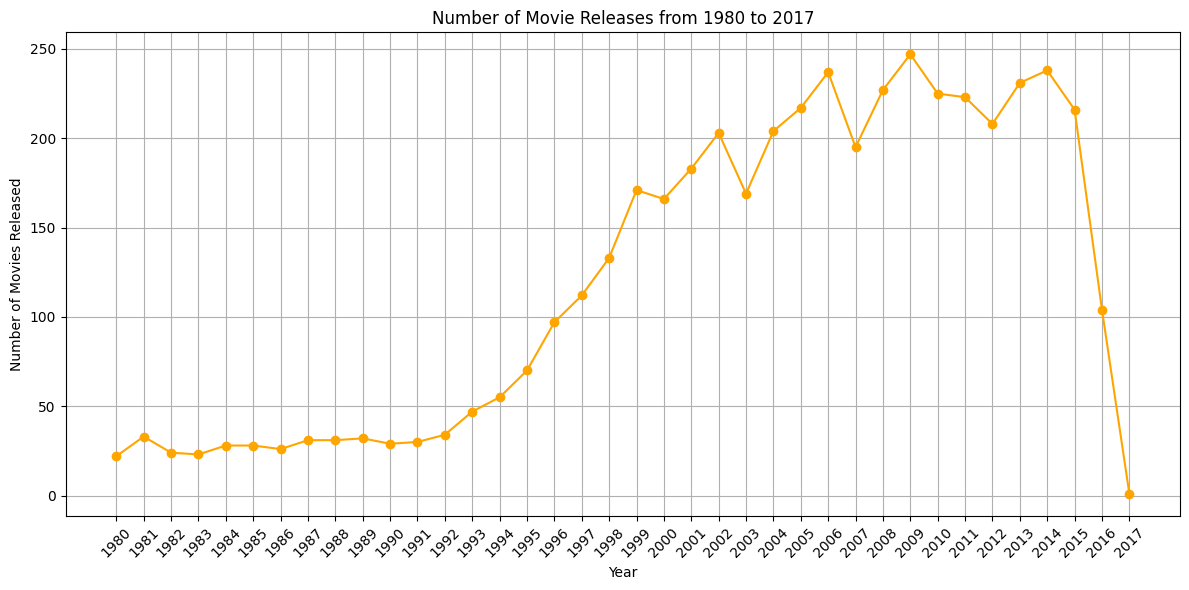

In [5]:
#line chart to see the number of movies relased over the years 1980 -> 2017


# Connect to the database for the new query
conn = sqlite3.connect('TMDB.db')

# Query to count movies released each year from 1980 to present
query_releases_over_years = '''
SELECT strftime('%Y', release_date) AS year, COUNT(*) AS movie_count
FROM movies
WHERE release_date IS NOT NULL AND release_date >= '1980-01-01'
GROUP BY year
ORDER BY year
'''

# Load data into a DataFrame
release_data = pd.read_sql_query(query_releases_over_years, conn)

# Plotting the number of movie releases over the years
plt.figure(figsize=(12, 6))
plt.plot(release_data['year'], release_data['movie_count'], marker='o', linestyle='-', color='orange')
plt.title('Number of Movie Releases from 1980 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

# Close the connection
conn.close()


#insights: at the start of the 2000s till 2015 the number of movies reales number is high(peak) -> why?
# and why after 2015 its down